<a href="https://colab.research.google.com/github/Meta-Sean/Course-6-Mono/blob/main/6_0002_ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Problem Set 4: Simulating the Spread of Disease and Bacteria Population Dynamics
# Name:
# Collaborators (Discussion):
# Time:

import math
import numpy as np
import pylab as pl
import random


##########################
# End helper code
##########################

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleBacteria
    and ResistantBacteria classes to indicate that a bacteria cell does not
    reproduce. You should use NoChildException as is; you do not need to
    modify it or add any code.
    """


def make_one_curve_plot(x_coords, y_coords, x_label, y_label, title):
    """
    Makes a plot of the x coordinates and the y coordinates with the labels
    and title provided.

    Args:
        x_coords (list of floats): x coordinates to graph
        y_coords (list of floats): y coordinates to graph
        x_label (str): label for the x-axis
        y_label (str): label for the y-axis
        title (str): title for the graph
    """
    pl.figure()
    pl.plot(x_coords, y_coords)
    pl.xlabel(x_label)
    pl.ylabel(y_label)
    pl.title(title)
    pl.show()


def make_two_curve_plot(x_coords,
                        y_coords1,
                        y_coords2,
                        y_name1,
                        y_name2,
                        x_label,
                        y_label,
                        title):
    """
    Makes a plot with two curves on it, based on the x coordinates with each of
    the set of y coordinates provided.

    Args:
        x_coords (list of floats): the x coordinates to graph
        y_coords1 (list of floats): the first set of y coordinates to graph
        y_coords2 (list of floats): the second set of y-coordinates to graph
        y_name1 (str): name describing the first y-coordinates line
        y_name2 (str): name describing the second y-coordinates line
        x_label (str): label for the x-axis
        y_label (str): label for the y-axis
        title (str): the title of the graph
    """
    pl.figure()
    pl.plot(x_coords, y_coords1, label=y_name1)
    pl.plot(x_coords, y_coords2, label=y_name2)
    pl.legend()
    pl.xlabel(x_label)
    pl.ylabel(y_label)
    pl.title(title)
    pl.show()

In [2]:
##########################
# PROBLEM 1
##########################
random.seed(0)


class SimpleBacteria(object):
    """A simple bacteria cell with no antibiotic resistance"""

    def __init__(self, birth_prob, death_prob):
        """
        Args:
            birth_prob (float in [0, 1]): Maximum possible reproduction
                probability
            death_prob (float in [0, 1]): Maximum death probability
        """
        self.birth_prob = birth_prob
        self.death_prob = death_prob

    def is_killed(self):
        """
        Stochastically determines whether this bacteria cell is killed in
        the patient's body at a time step, i.e. the bacteria cell dies with
        some probability equal to the death probability each time step.

        Returns:
            bool: True with probability self.death_prob, False otherwise.
        """
        return True if random.random() <= self.death_prob else False

    def reproduce(self, pop_density):
        """
        Stochastically determines whether this bacteria cell reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes.

        The bacteria cell reproduces with probability
        self.birth_prob * (1 - pop_density).

        If this bacteria cell reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleBacteria (which has the same
        birth_prob and death_prob values as its parent).

        Args:
            pop_density (float): The population density, defined as the
                current bacteria population divided by the maximum population

        Returns:
            SimpleBacteria: A new instance representing the offspring of
                this bacteria cell (if the bacteria reproduces). The child
                should have the same birth_prob and death_prob values as
                this bacteria.

        Raises:
            NoChildException if this bacteria cell does not reproduce.
        """
        if random.random() <= self.birth_prob * (1 - pop_density):
          return SimpleBacteria(self.birth_prob, self.death_prob)
        else:
          raise NoChildException("bacteria cell does not reproduce")


class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any
    antibiotics and his/her bacteria populations have no antibiotic resistance.
    """
    def __init__(self, bacteria, max_pop):
        """
        Args:
            bacteria (list of SimpleBacteria): The bacteria in the population
            max_pop (int): Maximum possible bacteria population size for
                this patient
        """
        self.bacteria = bacteria
        self.max_pop = max_pop

    def get_total_pop(self):
        """
        Gets the size of the current total bacteria population.

        Returns:
            int: The total bacteria population
        """
        return len(self.bacteria)

    def update(self):
        """
        Update the state of the bacteria population in this patient for a
        single time step. update() should execute the following steps in
        this order:

        1. Determine whether each bacteria cell dies (according to the
           is_killed method) and create a new list of surviving bacteria cells.

        2. Calculate the current population density by dividing the surviving
           bacteria population by the maximum population. This population
           density value is used for the following steps until the next call
           to update()

        3. Based on the population density, determine whether each surviving
           bacteria cell should reproduce and add offspring bacteria cells to
           a list of bacteria in this patient. New offspring do not reproduce.

        4. Reassign the patient's bacteria list to be the list of surviving
           bacteria and new offspring bacteria

        Returns:
            int: The total bacteria population at the end of the update
        """
        surviving = []
        for cell in self.bacteria:
          if cell.is_killed():
            continue
          else:
            surviving.append(cell)
        curr_pop_density = len(surviving) / self.max_pop
        off_spring = []
        for cell in surviving:
          try:
            off_spring.append(cell.reproduce(curr_pop_density))
          except NoChildException:
            continue

        self.bacteria = surviving + off_spring


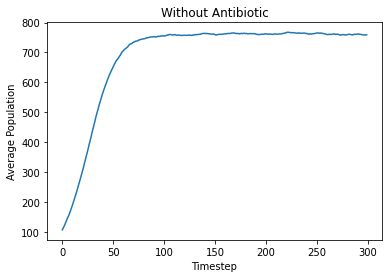

In [3]:
##########################
# PROBLEM 2
##########################
from numpy import mean

def calc_pop_avg(populations, n):
    """
    Finds the average bacteria population size across trials at time step n

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j

    Returns:
        float: The average bacteria population size at time step n
    """
    # avg_pop = []
    # for pop in populations:
    #   avg_pop.append(pop[n])
      
    # return mean(avg_pop)
    total_size = 0
    for population in populations:
        total_size += population[n]
    return total_size / len(populations)


def simulation_without_antibiotic(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                  num_trials):
    """
    Run the simulation and plot the graph for problem 2. No antibiotics
    are used, and bacteria do not have any antibiotic resistance.

    For each of num_trials trials:
        * instantiate a list of SimpleBacteria
        * instantiate a Patient using the list of SimpleBacteria
        * simulate changes to the bacteria population for 300 timesteps,
          recording the bacteria population after each time step. Note
          that the first time step should contain the starting number of
          bacteria in the patient

    Then, plot the average bacteria population size (y-axis) as a function of
    elapsed time steps (x-axis) You might find the make_one_curve_plot
    function useful.

    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0, 1]): maximum reproduction
            probability
        death_prob (float in [0, 1]): maximum death probability
        num_trials (int): number of simulation runs to execute

    Returns:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j
    """
    populations = []
    for trial in range(num_trials):
      bacteria = []
      for cell in range(num_bacteria):
        bacteria.append(SimpleBacteria(birth_prob, death_prob))
      patient = Patient(bacteria, max_pop)
      population = []
      for i in range(300):
        patient.update()
        population.append(patient.get_total_pop())
      populations.append(population)

    return populations

populations = simulation_without_antibiotic(100, 1000, 0.1, 0.025, 50)

avgList = []
for i in range(300):
    avgList.append(calc_pop_avg(populations, i))
make_one_curve_plot(range(300), avgList, 'Timestep', 'Average Population', 'Without Antibiotic')


In [4]:
# When you are ready to run the simulation, uncomment the next line
# populations = simulation_without_antibiotic(100, 1000, 0.1, 0.025, 50)

##########################
# PROBLEM 3
##########################

def calc_pop_std(populations, t):
    """
    Finds the standard deviation of populations across different trials
    at time step t by:
        * calculating the average population at time step t
        * compute average squared distance of the data points from the average
          and take its square root

    You may not use third-party functions that calculate standard deviation,
    such as numpy.std. Other built-in or third-party functions that do not
    calculate standard deviation may be used.

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria present in trial i at time step j
        t (int): time step

    Returns:
        float: the standard deviation of populations across different trials at
             a specific time step
    """
    avg_population = calc_pop_avg(populations,t)
    variance = 0.0
    for pop in populations:
      variance += (pop[t] - avg_population)**2
    variance = variance/len(populations)
    return variance**0.5
    



def calc_95_ci(populations, t):
    """
    Finds a 95% confidence interval around the average bacteria population
    at time t by:
        * computing the mean and standard deviation of the sample
        * using the standard deviation of the sample to estimate the
          standard error of the mean (SEM)
        * using the SEM to construct confidence intervals around the
          sample mean

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria present in trial i at time step j
        t (int): time step

    Returns:
        mean (float): the sample mean
        width (float): 1.96 * SEM

        I.e., you should return a tuple containing (mean, width)
    """
    sample_mean = calc_pop_avg(populations, t)
    sample_std = calc_pop_std(populations, t)
    sem = sample_std / len(populations)**0.5
    return (sample_mean, 1.96*sem)


In [11]:
##########################
# PROBLEM 4
##########################

class ResistantBacteria(SimpleBacteria):
    """A bacteria cell that can have antibiotic resistance."""

    def __init__(self, birth_prob, death_prob, resistant, mut_prob):
        """
        Args:
            birth_prob (float in [0, 1]): reproduction probability
            death_prob (float in [0, 1]): death probability
            resistant (bool): whether this bacteria has antibiotic resistance
            mut_prob (float): mutation probability for this
                bacteria cell. This is the maximum probability of the
                offspring acquiring antibiotic resistance
        """
        SimpleBacteria.__init__(self, birth_prob, death_prob)
        self.resistant = resistant
        self.mut_prob = mut_prob

    def get_resistant(self):
        """Returns whether the bacteria has antibiotic resistance"""
        return self.resistant

    def is_killed(self):
        """Stochastically determines whether this bacteria cell is killed in
        the patient's body at a given time step.

        Checks whether the bacteria has antibiotic resistance. If resistant,
        the bacteria dies with the regular death probability. If not resistant,
        the bacteria dies with the regular death probability / 4.

        Returns:
            bool: True if the bacteria dies with the appropriate probability
                and False otherwise.
        """
        if self.get_resistant():
          return random.random() <= self.death_prob 
        else:
          return random.random() <= self.death_prob / 4 

    def reproduce(self, pop_density):
        """
        Stochastically determines whether this bacteria cell reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A surviving bacteria cell will reproduce with probability:
        self.birth_prob * (1 - pop_density).

        If the bacteria cell reproduces, then reproduce() creates and returns
        an instance of the offspring ResistantBacteria, which will have the
        same birth_prob, death_prob, and mut_prob values as its parent.

        If the bacteria has antibiotic resistance, the offspring will also be
        resistant. If the bacteria does not have antibiotic resistance, its
        offspring have a probability of self.mut_prob * (1-pop_density) of
        developing that resistance trait. That is, bacteria in less densely
        populated environments have a greater chance of mutating to have
        antibiotic resistance.

        Args:
            pop_density (float): the population density

        Returns:
            ResistantBacteria: an instance representing the offspring of
            this bacteria cell (if the bacteria reproduces). The child should
            have the same birth_prob, death_prob values and mut_prob
            as this bacteria. Otherwise, raises a NoChildException if this
            bacteria cell does not reproduce.
        """
        if self.resistant:
          res = self.resistant
        else:
          res = random.random() <= self.mut_prob * (1-pop_density) 
        if random.random() <= self.birth_prob * (1 - pop_density):
          return ResistantBacteria(self.birth_prob, self.death_prob, res, self.mut_prob)
        else:
          raise NoChildException("resistent bacteria cell does not reproduce")


class TreatedPatient(Patient):
    """
    Representation of a treated patient. The patient is able to take an
    antibiotic and his/her bacteria population can acquire antibiotic
    resistance. The patient cannot go off an antibiotic once on it.
    """
    def __init__(self, bacteria, max_pop):
        """
        Args:
            bacteria: The list representing the bacteria population (a list of
                      bacteria instances)
            max_pop: The maximum bacteria population for this patient (int)

        This function should initialize self.on_antibiotic, which represents
        whether a patient has been given an antibiotic. Initially, the
        patient has not been given an antibiotic.

        Don't forget to call Patient's __init__ method at the start of this
        method.
        """
        Patient.__init__(self, bacteria, max_pop)
        self.bacteria = bacteria
        self.max_pop = max_pop
        self.on_antibiotic = False

    def set_on_antibiotic(self):
        """
        Administer an antibiotic to this patient. The antibiotic acts on the
        bacteria population for all subsequent time steps.
        """
        self.on_antibiotic = True

    def get_resist_pop(self):
        """
        Get the population size of bacteria cells with antibiotic resistance

        Returns:
            int: the number of bacteria with antibiotic resistance
        """
        count = 0
        for cell in self.bacteria:
          if cell.get_resistant():
            count += 1
        return count

    def update(self):
        """
        Update the state of the bacteria population in this patient for a
        single time step. update() should execute these actions in order:

        1. Determine whether each bacteria cell dies (according to the
           is_killed method) and create a new list of surviving bacteria cells.

        2. If the patient is on antibiotics, the surviving bacteria cells from
           (1) only survive further if they are resistant. If the patient is
           not on the antibiotic, keep all surviving bacteria cells from (1)

        3. Calculate the current population density. This value is used until
           the next call to update(). Use the same calculation as in Patient

        4. Based on this value of population density, determine whether each
           surviving bacteria cell should reproduce and add offspring bacteria
           cells to the list of bacteria in this patient.

        5. Reassign the patient's bacteria list to be the list of survived
           bacteria and new offspring bacteria

        Returns:
            int: The total bacteria population at the end of the update
        """
        surviving = []
        for cell in self.bacteria:
          if cell.is_killed():
            continue
          else:
            surviving.append(cell)
        if self.on_antibiotic:
          for cell in surviving:
            if cell.get_resistant():
              continue
            else:
              del surviving[surviving.index(cell)]
        curr_pop_density = len(surviving) / self.max_pop
        off_spring = []
        for cell in surviving:
          try:
            off_spring.append(cell.reproduce(curr_pop_density))
          except NoChildException:
            continue
        self.bacteria = surviving + off_spring
        return self.get_total_pop()

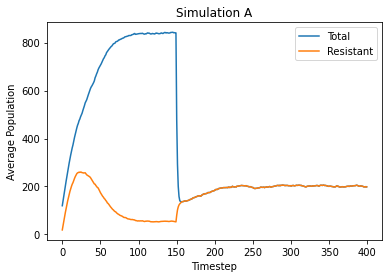

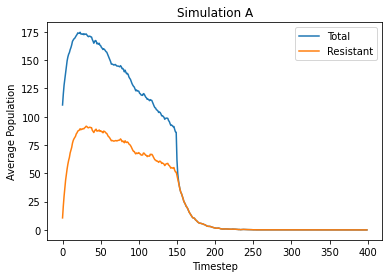

In [18]:
##########################
# PROBLEM 5
##########################
random.seed(0)

def simulation_with_antibiotic(num_bacteria,
                               max_pop,
                               birth_prob,
                               death_prob,
                               resistant,
                               mut_prob,
                               num_trials):
    """
    Runs simulations and plots graphs for problem 4.

    For each of num_trials trials:
        * instantiate a list of ResistantBacteria
        * instantiate a patient
        * run a simulation for 150 timesteps, add the antibiotic, and run the
          simulation for an additional 250 timesteps, recording the total
          bacteria population and the resistance bacteria population after
          each time step

    Plot the average bacteria population size for both the total bacteria
    population and the antibiotic-resistant bacteria population (y-axis) as a
    function of elapsed time steps (x-axis) on the same plot. You might find
    the helper function make_two_curve_plot helpful

    Args:
        num_bacteria (int): number of ResistantBacteria to create for
            the patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float int [0-1]): reproduction probability
        death_prob (float in [0, 1]): probability of a bacteria cell dying
        resistant (bool): whether the bacteria initially have
            antibiotic resistance
        mut_prob (float in [0, 1]): mutation probability for the
            ResistantBacteria cells
        num_trials (int): number of simulation runs to execute

    Returns: a tuple of two lists of lists, or two 2D arrays
        populations (list of lists or 2D array): the total number of bacteria
            at each time step for each trial; total_population[i][j] is the
            total population for trial i at time step j
        resistant_pop (list of lists or 2D array): the total number of
            resistant bacteria at each time step for each trial;
            resistant_pop[i][j] is the number of resistant bacteria for
            trial i at time step j
    """
    populations = []
    resistant_pop = []
    for trial in range(num_trials):
      population = []
      resistant_trial = []
      bacteria = [ResistantBacteria(birth_prob, death_prob, resistant, mut_prob)] * num_bacteria
      # for cell in range(num_bacteria):
      #   bacteria.append(ResistantBacteria(birth_prob, death_prob, resistant, mut_prob))
      treated_patient = TreatedPatient(bacteria, max_pop)
      for i in range(150):
        population.append(treated_patient.update())
        resistant_trial.append(treated_patient.get_resist_pop())
      treated_patient.set_on_antibiotic()
      for i in range(250):
        population.append(treated_patient.update())
        resistant_trial.append(treated_patient.get_resist_pop())
      populations.append(population)
      resistant_pop.append(resistant_trial)

    avgList = []
    resistList = []
    for i in range(400):
        avgList.append(calc_pop_avg(populations, i))
        resistList.append(calc_pop_avg(resistant_pop, i))
    make_two_curve_plot(range(400), avgList, resistList, 'Total', 'Resistant', 'Timestep', 'Average Population', 'Simulation A')

    return populations, resistant_pop


# When you are ready to run the simulations, uncomment the next lines one
# at a time
total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.3,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)


# def make_two_curve_plot(x_coords,
#                         y_coords1,
#                         y_coords2,
#                         y_name1,
#                         y_name2,
#                         x_label,
#                         y_label,
#                         title):

total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.17,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)


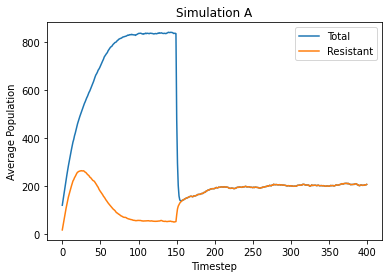

95% confidence interval for the total population: 202.360 ± 7.989
95% confidence interval for the resistant bacteria: 202.360 ± 7.989


In [20]:
total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.3,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)

mean, sem = calc_95_ci(total_pop, 299)
print('95% confidence interval for the total population: {:.3f} ± {:.3f}'.format(mean, sem))
mean, sem = calc_95_ci(resistant_pop, 299)
print('95% confidence interval for the resistant bacteria: {:.3f} ± {:.3f}'.format(mean, sem))

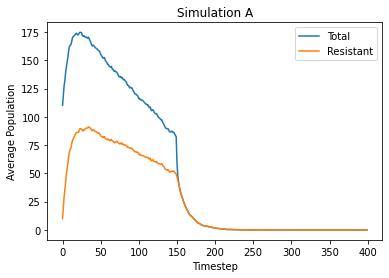

95% confidence interval for the total population: 0.040 ± 0.078
95% confidence interval for the resistant bacteria: 0.040 ± 0.078


In [21]:
total_pop, resistant_pop = simulation_with_antibiotic(num_bacteria=100,
                                                      max_pop=1000,
                                                      birth_prob=0.17,
                                                      death_prob=0.2,
                                                      resistant=False,
                                                      mut_prob=0.8,
                                                      num_trials=50)

mean, sem = calc_95_ci(total_pop, 299)
print('95% confidence interval for the total population: {:.3f} ± {:.3f}'.format(mean, sem))
mean, sem = calc_95_ci(resistant_pop, 299)
print('95% confidence interval for the resistant bacteria: {:.3f} ± {:.3f}'.format(mean, sem))

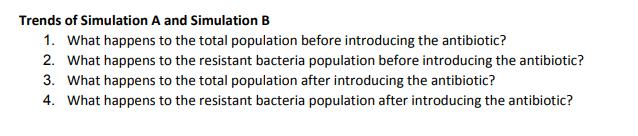

1. Only limit on growth or birth and death probabilites and reaching its maximum population density
2. Follows its natural birth and death rate given their probabilities. 
3. Covergence to the mean resistant population. Total population now equals the resistant population. 
4. Only surviving bacteria population is the resistant bacteria and they continue their growth or decline rates. 

In [8]:
import unittest


population = [[100, 115, 122, 129, 134, 138, 151, 167, 174, 183, 196, 208, 215, 223, 233,
240, 253, 268, 284, 294, 306, 316, 325, 338, 360, 372, 378, 388, 399, 415, 414, 431, 456,
477, 485, 493, 510, 530, 547, 569, 575, 580, 579, 588, 597, 605, 625, 626, 632, 640, 653,
660, 668, 681, 685, 690, 695, 691, 693, 689, 696, 706, 720, 717, 718, 713, 720, 723, 726,
731, 728, 721, 727, 731, 734, 741, 751, 748, 750, 750, 752, 752, 745, 753, 752, 756, 753,
745, 747, 747, 750, 745, 751, 759, 753, 754, 762, 765, 754, 764, 767, 769, 770, 775, 784,
787, 789, 786, 783, 773, 770, 764, 764, 767, 767, 768, 765, 765, 750, 753, 745, 745, 746,
753, 754, 763, 767, 777, 778, 784, 782, 782, 783, 788, 790, 782, 786, 792, 799, 792, 779,
778, 768, 768, 768, 775, 774, 783, 782, 778, 778, 789, 771, 775, 770, 780, 778, 780, 771,
765, 762, 758, 768, 762, 777, 774, 776, 779, 771, 768, 781, 783, 793, 801, 803, 798, 794,
798, 799, 801, 804, 802, 807, 795, 776, 773, 779, 775, 777, 783, 791, 787, 778, 782, 789,
782, 773, 775, 782, 779, 778, 774, 776, 782, 770, 773, 775, 772, 777, 772, 772, 774, 771,
760, 764, 766, 758, 759, 758, 745, 744, 754, 760, 770, 765, 764, 754, 769, 760, 762, 762,
765, 754, 762, 762, 764, 757, 762, 759, 758, 748, 752, 764, 758, 762, 761, 755, 747, 746,
744, 750, 748, 746, 756, 762, 758, 754, 758, 754, 747, 750, 752, 744, 741, 744, 756, 768,
773, 772, 768, 764, 762, 754, 761, 760, 749, 746, 744, 741, 748, 745, 751, 753, 744, 736,
746, 749, 749, 762, 756, 762, 762, 756, 761, 762, 762, 755, 763, 772, 761], [100, 113, 125,
129, 136, 151, 166, 177, 186, 196, 208, 215, 219, 235, 239, 257, 270, 288, 299, 310, 322, 335,
344, 354, 375, 395, 408, 429, 446, 451, 471, 497, 515, 528, 525, 542, 558, 567, 580, 593, 604,
613, 619, 628, 631, 645, 656, 676, 676, 685, 704, 711, 715, 724, 724, 725, 725, 725, 740, 737,
736, 752, 757, 759, 762, 762, 771, 759, 755, 754, 752, 752, 755, 765, 766, 766, 761, 766, 761,
752, 755, 756, 765, 769, 768, 770, 769, 772, 766, 770, 771, 773, 782, 771, 768, 767, 769, 781,
779, 780, 775, 772, 761, 759, 760, 762, 761, 763, 756, 758, 766, 759, 748, 751, 750, 750, 761,
756, 767, 776, 780, 780, 767, 762, 759, 760, 757, 761, 766, 770, 757, 758, 763, 759, 754, 746,
754, 760, 755, 758, 757, 769, 773, 773, 764, 770, 770, 770, 774, 768, 775, 779, 779, 769, 766,
766, 769, 759, 749, 756, 776, 770, 771, 761, 765, 766, 771, 783, 782, 774, 774, 771, 765, 753,
767, 770, 771, 769, 770, 767, 764, 757, 763, 769, 766, 767, 776, 773, 771, 775, 771, 776, 767,
756, 760, 764, 757, 753, 745, 745, 759, 751, 752, 749, 740, 748, 740, 740, 742, 740, 737, 744,
739, 744, 750, 753, 751, 750, 764, 775, 759, 762, 767, 772, 774, 781, 776, 772, 778, 785, 771,
762, 757, 752, 747, 754, 757, 757, 763, 766, 765, 758, 762, 760, 757, 765, 769, 764, 761, 762,
764, 762, 751, 752, 747, 747, 750, 752, 765, 771, 766, 765, 755, 751, 750, 743, 749, 750, 743,
752, 749, 736, 750, 749, 746, 754, 744, 743, 730, 730, 719, 721, 724, 731, 732, 735, 746, 740,
741, 750, 750, 740, 738, 741, 734, 728, 745, 740, 732, 738], [100, 112, 117, 130, 139, 149,
156, 169, 172, 189, 200, 216, 223, 233, 247, 257, 268, 280, 292, 302, 308, 323, 338, 346, 359,
379, 388, 390, 410, 427, 447, 462, 469, 485, 499, 521, 536, 548, 557, 555, 566, 571, 577, 580,
592, 607, 612, 620, 628, 629, 629, 635, 647, 657, 661, 672, 689, 694, 697, 713, 715, 720, 724,
734, 746, 749, 736, 740, 752, 763, 759, 751, 753, 749, 741, 743, 750, 751, 758, 769, 775, 784,
784, 786, 789, 790, 798, 800, 794, 802, 796, 801, 803, 791, 795, 785, 779, 768, 758, 752, 753,
749, 759, 763, 754, 754, 753, 761, 772, 765, 768, 769, 771, 772, 768, 766, 764, 761, 770, 771,
773, 771, 768, 760, 756, 759, 755, 763, 758, 753, 757, 756, 764, 765, 763, 768, 770, 776, 776,
776, 778, 765, 769, 760, 763, 759, 770, 772, 778, 768, 777, 779, 782, 777, 774, 783, 776, 771,
775, 766, 769, 767, 763, 759, 749, 751, 746, 747, 746, 740, 743, 749, 757, 750, 752, 762, 768,
771, 769, 779, 775, 779, 772, 777, 785, 784, 782, 793, 784, 786, 788, 780, 781, 779, 773, 778,
780, 774, 766, 767, 765, 764, 766, 770, 765, 776, 785, 785, 792, 788, 786, 790, 785, 788, 793,
793, 788, 792, 789, 774, 775, 769, 770, 770, 773, 775, 770, 769, 763, 758, 766, 776, 776, 776,
778, 771, 775, 777, 776, 770, 773, 767, 761, 765, 762, 770, 772, 775, 781, 779, 767, 766, 767,
763, 763, 755, 753, 751, 758, 761, 764, 771, 772, 762, 764, 758, 756, 754, 752, 752, 748, 753,
763, 766, 766, 758, 756, 752, 759, 753, 749, 754, 751, 750, 751, 749, 751, 747, 751, 753, 739,
747, 745, 747, 748, 746, 755, 755, 760, 766], [100, 106, 113, 111, 117, 124, 136, 139, 152,
154, 161, 168, 176, 182, 194, 210, 226, 239, 256, 274, 287, 297, 314, 329, 343, 355, 356, 362,
376, 394, 405, 421, 432, 448, 471, 497, 508, 520, 525, 530, 538, 560, 576, 595, 604, 619, 635,
654, 656, 672, 683, 683, 692, 705, 704, 706, 705, 703, 710, 710, 714, 712, 722, 736, 737, 730,
727, 735, 734, 743, 752, 757, 751, 755, 769, 764, 769, 763, 764, 767, 762, 753, 744, 751, 741,
733, 733, 729, 734, 733, 745, 748, 750, 751, 746, 755, 751, 754, 755, 750, 753, 752, 754, 757,
760, 767, 768, 761, 763, 752, 748, 747, 747, 749, 765, 771, 774, 765, 763, 760, 758, 756, 754,
752, 736, 744, 751, 760, 757, 756, 755, 773, 775, 769, 765, 768, 773, 779, 771, 778, 765, 766,
760, 754, 746, 747, 749, 756, 757, 757, 761, 758, 746, 739, 745, 748, 756, 764, 765, 772, 776,
778, 772, 780, 777, 772, 763, 764, 771, 777, 776, 775, 780, 769, 770, 765, 759, 761, 758, 762,
759, 766, 774, 769, 769, 770, 773, 773, 777, 770, 770, 769, 761, 760, 767, 766, 765, 762, 758,
763, 760, 767, 760, 761, 762, 766, 765, 778, 776, 782, 773, 770, 782, 778, 776, 770, 767, 766,
755, 756, 753, 747, 744, 759, 760, 742, 746, 744, 748, 762, 759, 762, 770, 774, 784, 773, 763,
749, 742, 747, 731, 728, 731, 736, 745, 743, 737, 736, 736, 739, 739, 743, 740, 748, 760, 754,
757, 765, 772, 766, 767, 764, 751, 750, 750, 750, 753, 763, 767, 762, 765, 768, 774, 770, 768,
766, 765, 752, 745, 749, 751, 750, 750, 753, 747, 755, 762, 762, 770, 762, 756, 754, 754, 757,
763, 760, 752, 753, 765, 770], [100, 109, 121, 127, 135, 146, 150, 160, 167, 180, 196, 206,
226, 244, 254, 263, 277, 303, 310, 321, 325, 342, 356, 372, 383, 394, 407, 418, 422, 430, 459,
477, 485, 504, 517, 518, 520, 532, 542, 558, 574, 594, 607, 602, 606, 615, 628, 636, 654, 660,
656, 660, 662, 673, 684, 686, 698, 714, 715, 723, 727, 739, 736, 733, 741, 744, 744, 742, 751,
757, 758, 753, 754, 755, 758, 757, 763, 757, 754, 743, 740, 738, 739, 740, 739, 745, 739, 741,
736, 726, 737, 737, 740, 749, 750, 756, 754, 761, 774, 783, 781, 781, 773, 759, 754, 752, 754,
761, 749, 740, 739, 732, 727, 730, 744, 753, 763, 753, 752, 753, 761, 759, 759, 753, 743, 749,
743, 730, 734, 735, 737, 748, 756, 760, 754, 752, 758, 756, 758, 758, 764, 754, 756, 750, 759,
755, 759, 756, 752, 759, 761, 758, 750, 750, 756, 760, 764, 761, 764, 769, 761, 764, 761, 756,
749, 754, 768, 752, 749, 757, 751, 744, 752, 756, 753, 767, 770, 770, 762, 747, 749, 750, 747,
750, 748, 744, 750, 748, 742, 740, 741, 742, 750, 757, 750, 758, 755, 755, 745, 732, 728, 726,
735, 745, 752, 747, 752, 753, 747, 756, 748, 748, 751, 753, 747, 749, 756, 760, 761, 757, 756,
759, 753, 743, 751, 749, 756, 760, 774, 770, 780, 780, 775, 769, 756, 759, 761, 767, 774, 773,
770, 768, 773, 770, 765, 771, 759, 758, 753, 747, 739, 740, 741, 744, 741, 736, 743, 731, 740,
735, 736, 738, 734, 739, 736, 731, 732, 730, 730, 733, 730, 726, 735, 745, 745, 749, 747, 747,
750, 755, 754, 747, 762, 761, 764, 773, 769, 771, 771, 767, 761, 756, 753, 746, 757, 755, 756,
766, 759, 764], [100, 107, 112, 113, 124, 131, 134, 137, 148, 160, 174, 190, 201, 216, 225,
237, 246, 253, 259, 270, 277, 287, 305, 327, 351, 375, 381, 400, 425, 431, 454, 474, 493, 505,
523, 525, 536, 547, 559, 570, 579, 578, 588, 590, 609, 611, 620, 623, 631, 634, 640, 640, 642,
641, 657, 670, 672, 678, 683, 696, 700, 710, 717, 728, 725, 720, 722, 725, 730, 722, 725, 722,
732, 727, 732, 733, 732, 733, 743, 739, 747, 737, 737, 739, 745, 749, 748, 753, 738, 739, 742,
741, 748, 753, 761, 762, 761, 763, 770, 765, 755, 751, 750, 747, 757, 760, 771, 773, 772, 769,
777, 763, 762, 757, 759, 754, 750, 752, 753, 759, 762, 767, 759, 765, 771, 762, 764, 759, 763,
770, 768, 766, 754, 745, 747, 732, 719, 728, 733, 734, 731, 739, 744, 750, 753, 760, 763, 772,
775, 760, 764, 773, 777, 773, 766, 772, 775, 777, 779, 775, 784, 783, 772, 772, 764, 762, 759,
756, 768, 764, 768, 758, 754, 756, 755, 751, 752, 753, 762, 766, 768, 769, 779, 783, 785, 783,
785, 784, 782, 787, 787, 783, 788, 787, 787, 796, 786, 783, 791, 773, 786, 786, 792, 785, 788,
791, 785, 781, 784, 773, 777, 765, 772, 779, 770, 763, 755, 765, 764, 756, 755, 755, 749, 750,
746, 744, 758, 759, 760, 770, 772, 762, 757, 754, 752, 741, 740, 747, 754, 753, 762, 765, 761,
758, 759, 759, 770, 770, 757, 756, 767, 767, 766, 763, 765, 769, 771, 783, 796, 799, 797, 803,
802, 788, 789, 789, 794, 791, 796, 795, 795, 792, 781, 780, 783, 775, 772, 769, 763, 773, 771,
773, 772, 764, 758, 759, 760, 764, 753, 763, 768, 766, 760, 757, 756, 761, 760, 760, 753, 755], 
[100, 107, 113, 118, 124, 136, 140, 157, 165, 172, 182, 195, 201, 209, 214, 226, 236, 250, 256,
273, 288, 292, 306, 313, 325, 333, 347, 369, 388, 406, 423, 436, 453, 456, 472, 484, 490, 514,
524, 539, 553, 565, 580, 580, 590, 594, 603, 618, 622, 620, 635, 637, 646, 653, 654, 654, 661,
674, 679, 690, 699, 697, 694, 705, 695, 705, 707, 712, 718, 727, 728, 735, 730, 730, 729, 732,
724, 720, 727, 743, 748, 752, 759, 760, 765, 759, 752, 756, 746, 745, 732, 734, 741, 741, 747,
746, 737, 737, 733, 734, 734, 732, 743, 748, 746, 746, 752, 762, 767, 773, 775, 760, 754, 767,
766, 761, 753, 762, 768, 766, 762, 771, 775, 781, 779, 778, 785, 786, 791, 791, 792, 794, 782,
777, 780, 782, 785, 800, 803, 807, 802, 800, 800, 793, 793, 792, 788, 783, 785, 785, 791, 782,
774, 784, 792, 788, 795, 802, 791, 781, 776, 783, 783, 779, 778, 785, 787, 780, 780, 785, 792,
798, 790, 783, 783, 789, 789, 784, 770, 774, 777, 774, 777, 779, 776, 772, 764, 761, 762, 765,
767, 769, 763, 763, 757, 754, 756, 751, 745, 749, 743, 741, 752, 759, 758, 748, 747, 749, 747,
752, 756, 755, 753, 753, 743, 752, 741, 746, 743, 744, 729, 732, 735, 731, 740, 746, 742, 753,
754, 754, 756, 757, 765, 767, 763, 772, 777, 787, 797, 789, 780, 779, 770, 767, 757, 764, 767,
767, 767, 767, 767, 760, 752, 749, 751, 755, 758, 764, 760, 768, 777, 772, 768, 765, 776, 770,
769, 774, 769, 760, 764, 764, 756, 747, 756, 755, 759, 759, 770, 756, 751, 749, 756, 753, 761,
757, 768, 766, 758, 760, 778, 781, 773, 784, 791, 784, 779, 778, 775, 776], [100,
108, 114, 123, 131, 137, 145, 152, 157, 168, 175, 192, 209, 212, 220, 236, 248, 258, 264, 268,
282, 295, 300, 323, 331, 339, 355, 367, 385, 407, 414, 435, 449, 447, 470, 481, 484, 494, 509,
519, 530, 541, 551, 564, 570, 578, 587, 596, 594, 597, 613, 631, 641, 647, 656, 661, 677, 691,
700, 708, 717, 721, 722, 727, 725, 725, 726, 728, 730, 730, 726, 731, 728, 741, 734, 733, 733,
735, 716, 722, 728, 729, 730, 732, 720, 716, 710, 719, 723, 724, 730, 724, 738, 740, 743, 748,
755, 755, 758, 763, 758, 752, 755, 760, 757, 768, 770, 766, 763, 764, 755, 756, 752, 746, 750,
751, 754, 748, 755, 754, 752, 768, 759, 761, 766, 757, 767, 758, 757, 742, 750, 762, 754, 764,
760, 756, 762, 772, 778, 776, 772, 774, 771, 754, 773, 776, 773, 766, 769, 769, 770, 771, 769,
772, 770, 774, 774, 777, 782, 769, 762, 760, 760, 777, 783, 785, 789, 779, 776, 783, 791, 792,
801, 787, 781, 774, 770, 774, 773, 770, 767, 766, 761, 761, 764, 754, 749, 746, 748, 752, 750,
751, 755, 763, 756, 757, 763, 774, 773, 774, 776, 775, 777, 773, 783, 791, 780, 784, 775, 769,
774, 779, 782, 786, 792, 783, 793, 791, 778, 781, 779, 779, 778, 785, 778, 779, 773, 772, 768,
780, 777, 768, 776, 769, 776, 771, 768, 765, 766, 766, 764, 753, 752, 750, 749, 748, 749, 752,
760, 763, 749, 754, 753, 752, 749, 748, 747, 751, 742, 739, 731, 728, 728, 725, 712, 718, 716,
722, 724, 723, 736, 735, 747, 746, 746, 740, 739, 743, 742, 749, 742, 753, 752, 752, 752, 754,
764, 761, 766, 775, 773, 764, 771, 761, 762, 749, 745, 748, 754, 754], [100, 109, 120, 123,
128, 134, 138, 149, 153, 161, 173, 183, 200, 209, 216, 221, 235, 240, 247, 249, 259, 268, 285,
293, 311, 326, 360, 383, 400, 420, 434, 448, 467, 476, 488, 494, 511, 529, 542, 559, 561, 580,
592, 606, 613, 624, 641, 651, 661, 669, 670, 677, 668, 677, 677, 682, 684, 697, 692, 699, 700,
704, 704, 707, 714, 717, 720, 718, 716, 719, 718, 727, 725, 720, 730, 740, 747, 749, 754, 759,
763, 763, 763, 761, 768, 766, 762, 752, 750, 745, 750, 752, 759, 766, 764, 754, 756, 752, 766,
771, 772, 784, 786, 793, 776, 772, 774, 765, 762, 756, 755, 763, 766, 770, 774, 759, 769, 768,
768, 764, 767, 765, 755, 756, 767, 768, 762, 763, 764, 756, 757, 753, 760, 755, 774, 769, 772,
763, 763, 759, 755, 747, 756, 749, 746, 744, 752, 750, 754, 754, 763, 753, 757, 749, 758, 761,
757, 754, 745, 743, 739, 739, 745, 745, 741, 751, 740, 743, 735, 731, 737, 736, 731, 731, 725,
721, 721, 723, 735, 734, 735, 747, 755, 755, 745, 729, 737, 739, 734, 730, 737, 744, 741, 746,
742, 763, 760, 759, 769, 764, 767, 759, 757, 765, 762, 753, 760, 770, 761, 762, 763, 759, 770,
761, 759, 750, 741, 739, 739, 750, 755, 755, 757, 753, 753, 751, 753, 761, 760, 764, 765, 773,
770, 771, 765, 773, 781, 776, 769, 768, 762, 765, 760, 766, 763, 757, 750, 763, 761, 761, 764,
764, 759, 765, 762, 756, 755, 764, 750, 754, 759, 759, 755, 764, 771, 788, 779, 774, 772, 771,
779, 773, 770, 773, 780, 783, 782, 768, 768, 766, 762, 758, 758, 754, 742, 734, 740, 740, 736,
729, 745, 746, 751, 760, 763, 774, 776, 771, 774, 766], [100, 112, 117, 127, 133, 145, 158, 169,
174, 182, 190, 210, 225, 236, 243, 257, 272, 284, 298, 308, 318, 339, 353, 368, 375, 385, 405,
413, 427, 438, 447, 464, 477, 494, 501, 506, 527, 529, 537, 556, 566, 574, 592, 599, 606, 601,
612, 632, 631, 642, 651, 659, 664, 664, 670, 682, 683, 681, 677, 667, 668, 680, 698, 713, 717,
718, 720, 724, 724, 736, 734, 735, 748, 747, 755, 752, 752, 743, 746, 754, 757, 749, 750, 751,
750, 754, 758, 754, 758, 756, 749, 747, 759, 765, 767, 758, 747, 738, 749, 763, 770, 773, 755,
749, 758, 756, 750, 758, 748, 749, 750, 752, 744, 746, 751, 758, 754, 757, 758, 756, 755, 757,
761, 766, 768, 760, 758, 757, 749, 753, 761, 761, 752, 755, 750, 746, 747, 751, 755, 748, 749,
742, 732, 743, 738, 742, 750, 750, 750, 747, 752, 748, 741, 735, 746, 753, 763, 766, 765, 769,
777, 766, 766, 766, 765, 757, 747, 740, 722, 718, 723, 732, 742, 740, 747, 747, 746, 730, 731,
725, 717, 727, 726, 730, 734, 737, 728, 734, 727, 729, 731, 727, 741, 749, 754, 758, 767, 767,
768, 763, 765, 774, 776, 786, 783, 777, 776, 778, 786, 784, 787, 778, 770, 772, 780, 783, 777,
774, 765, 769, 763, 765, 766, 764, 763, 770, 770, 773, 784, 773, 768, 765, 761, 769, 760, 764,
765, 770, 761, 770, 768, 765, 760, 774, 767, 762, 764, 756, 755, 756, 759, 752, 751, 748, 753,
748, 742, 746, 741, 740, 735, 745, 750, 752, 749, 744, 744, 753, 745, 743, 747, 746, 750, 754,
753, 747, 751, 752, 753, 752, 755, 751, 759, 752, 748, 746, 751, 756, 749, 753, 753, 757, 755,
765, 767, 767, 767, 770, 768, 775]]

class ps4_calc(unittest.TestCase):
	def test_calc_pop_avg(self):
		avg = 762.5
		calc_avg = calc_pop_avg(population, 299)
		print(calc_avg)
		self.assertTrue(avg-1 < calc_avg < avg+1, "Got incorrect population average {} instead of {}.".format(calc_avg, avg))

	def test_calc_pop_std(self):
		std = 10.735455276791944
		calc_std = calc_pop_std(population, 299)
		print(calc_std)
		self.assertTrue(std -0.1 < calc_std < std + 0.1, "Got incorrect population standard deviation {} instead of {}.".format(calc_std, std))

	def test_calc_95_ci(self):
		ci_95 = 6.6539041171330382
		calc_avg, calc_ci_95 = calc_95_ci(population, 299)
		print(calc_ci_95)
		self.assertTrue(ci_95 - 0.1 < calc_ci_95 < ci_95 + 0.1, "Got incorrect population 95% CI {} instead of {}.".format(calc_ci_95, ci_95))

if __name__ == "__main__":
	suite = unittest.TestSuite()
	suite.addTest(unittest.makeSuite(ps4_calc))
	unittest.TextTestRunner(verbosity=3).run(suite)

test_calc_95_ci (__main__.ps4_calc) ... ok
test_calc_pop_avg (__main__.ps4_calc) ... ok
test_calc_pop_std (__main__.ps4_calc) ... 

6.653904117133038
762.5
10.735455276791944


ok

----------------------------------------------------------------------
Ran 3 tests in 0.013s

OK
